In [61]:
# Check
# few common alleles and het close to 1
# ones very different in h3africa vs. 1000G AFR
# why many are stuck at het=0.5? creates weird structure in the graph

In [62]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.colors import LogNorm
import seaborn as sns

import pandas as pd

# TODO replace with all chroms, separate homopolymer/non
data = pd.read_csv("chr1.stats.tab", sep="\t", nrows=100000)
data

Populating the interactive namespace from numpy and matplotlib


,chrom,start,end,nalleles-ALL,nalleles-EUR,nalleles-EAS,nalleles-SAS,nalleles-AMR,nalleles-AFR,nalleles-H3A,het-ALL,het-EUR,het-EAS,het-SAS,het-AMR,het-AFR,het-H3A
0,chr1,899025,899048,2,2,2,2,2,2,3,0.402000,0.41300,0.289,0.425,0.44200,0.420,0.593
1,chr1,902774,902789,2,2,3,2,2,2,2,0.489000,0.35400,0.482,0.373,0.48400,0.519,0.526
2,chr1,904654,904666,1,1,2,2,1,2,1,0.104000,0.03420,0.123,0.135,0.06700,0.139,0.115
3,chr1,907237,907251,2,2,2,2,2,2,2,0.489000,0.40500,0.489,0.502,0.43700,0.498,0.500
4,chr1,907539,907563,4,3,3,4,4,4,4,0.652000,0.51700,0.640,0.666,0.60400,0.715,0.754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78195,chr1,113794136,113794148,1,1,1,1,1,1,1,0.000000,0.00000,0.000,0.000,0.00000,0.000,0.000
78196,chr1,113794460,113794473,1,1,1,1,1,1,1,0.000624,0.00158,0.000,0.000,0.00204,0.000,0.000
78197,chr1,113795336,113795348,1,1,1,1,1,1,1,0.000000,0.00000,0.000,0.000,0.00000,0.000,0.000
78198,chr1,113796505,113796517,1,1,1,1,1,1,1,0.033000,0.00000,0.000,0.000,0.00204,0.113,0.123


# Number of alleles vs. heterozygosity

Goal is to show there is a big spread

[0.5843606138107417, 0.2064066496163683, 0.10338874680306906, 0.056918158567774935, 0.029104859335038362, 0.012774936061381074, 0.0047570332480818414, 0.0017391304347826088, 0.00038363171355498723, 8.951406649616369e-05]


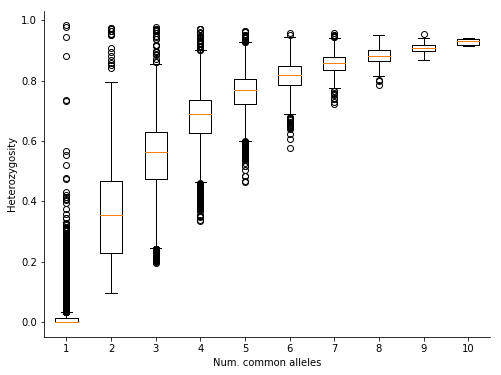

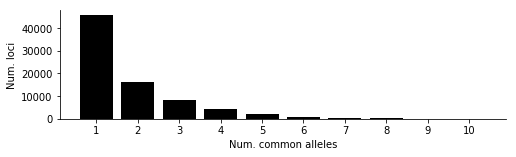

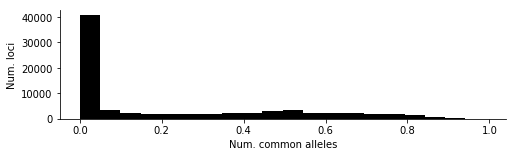

In [63]:
MAX_N = 10

# Plot num alleles vs. het
fig = plt.figure()
fig.set_size_inches((8, 6))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

boxdata = []
for n in range(1, MAX_N+1):
    boxdata.append(list(data[data["nalleles-ALL"]==n]["het-ALL"]))
ax.boxplot(boxdata);
ax.set_xlabel("Num. common alleles")
ax.set_ylabel("Heterozygosity");
fig.savefig("HetVsNallele-Boxplot.pdf")

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches((8, 2))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.bar(range(1, MAX_N+1), [data[data["nalleles-ALL"]==n].shape[0] for n in range(1, MAX_N+1)],
      color="black");
ax.set_xticks(range(1,MAX_N+1))
ax.set_xticklabels(range(1,MAX_N+1));
ax.set_xlabel("Num. common alleles")
ax.set_ylabel("Num. loci");
fig.savefig("HetVsNallele-NAlleleHist.pdf")

# Print percentages to annotate and cite in the text
print([data[data["nalleles-ALL"]==n].shape[0]/data.shape[0] for n in range(1, MAX_N+1)])

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches((8, 2))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.hist(data["het-ALL"], color="black", bins=20)
ax.set_xlabel("Num. common alleles")
ax.set_ylabel("Num. loci");
fig.savefig("HetVsNallele-HetHist.pdf")

# Pairwise population comparisons (het)

EUR AFR
EUR EAS
EUR SAS
EUR AMR
EUR H3A
AFR EAS
AFR SAS
AFR AMR
AFR H3A
EAS SAS
EAS AMR
EAS H3A
SAS AMR
SAS H3A
AMR H3A


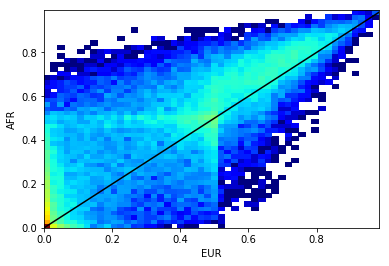

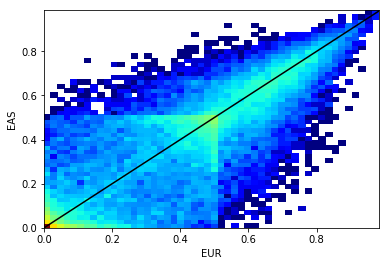

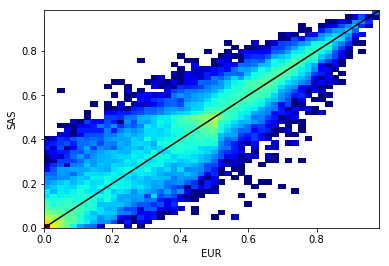

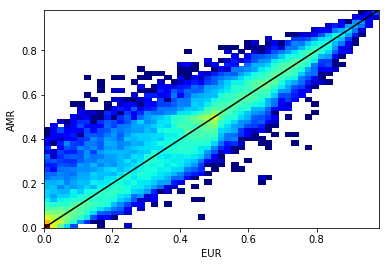

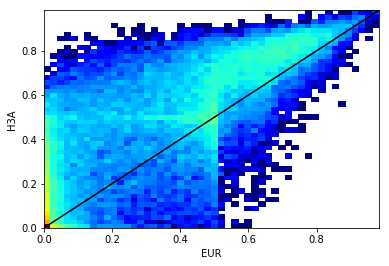

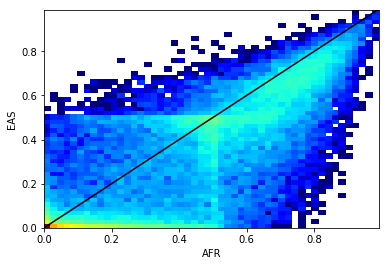

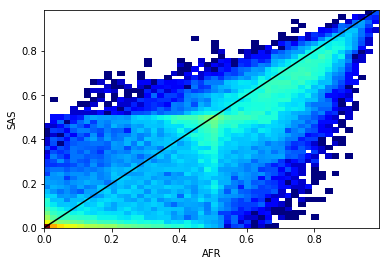

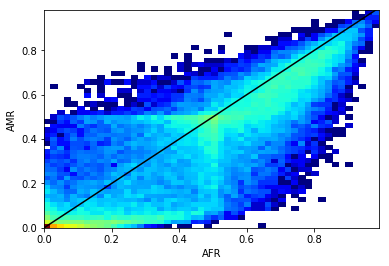

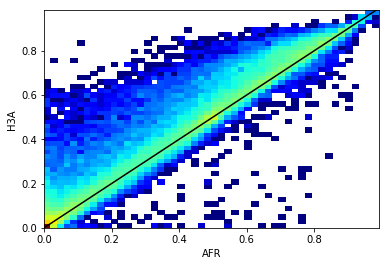

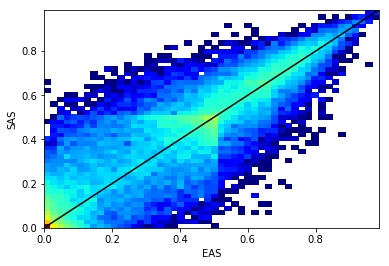

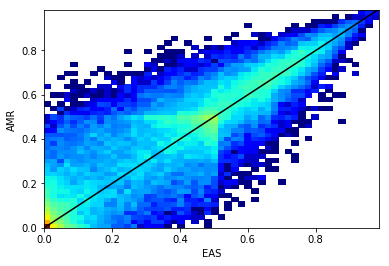

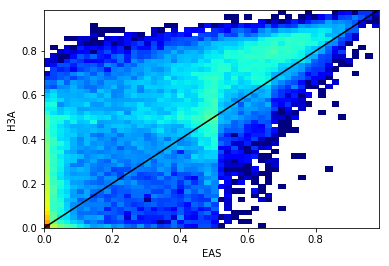

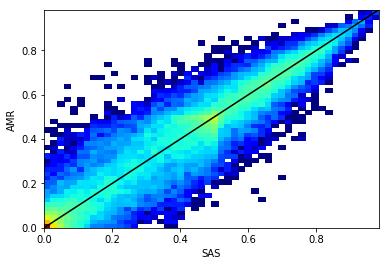

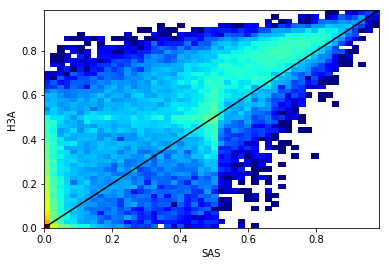

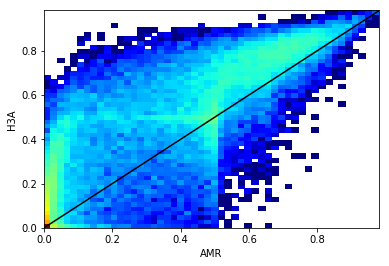

In [64]:
spops = ["EUR","AFR","EAS","SAS","AMR","H3A"]
mycmap = plt.cm.jet

for i in range(len(spops)):
    for j in range(i, len(spops)):
        if i==j: continue
        pop1 = spops[i]
        pop2 = spops[j]
        print("%s %s"%(pop1, pop2))
        
        xx = data[~np.isnan(data["het-%s"%pop1]) & ~np.isnan(data["het-%s"%pop2])]
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.hist2d(xx["het-%s"%pop1], xx["het-%s"%pop2], bins=50,
                  norm=LogNorm(), cmap=mycmap);
        ax.plot([0,1],[0,1], color="black")
        ax.set_xlabel(pop1)
        ax.set_ylabel(pop2)

In [79]:
data[(data["het-AFR"]>0.5)& (data["het-H3A"]<0.01)]

,chrom,start,end,nalleles-ALL,nalleles-EUR,nalleles-EAS,nalleles-SAS,nalleles-AMR,nalleles-AFR,nalleles-H3A,het-ALL,het-EUR,het-EAS,het-SAS,het-AMR,het-AFR,het-H3A
9270,chr1,13627584,13627652,3,2,2,4,2,4,1,0.613,0.551,0.530,0.623,0.536,0.688,0.00287
25891,chr1,33093712,33093748,2,2,3,2,3,3,1,0.325,0.169,0.266,0.191,0.235,0.537,0.00000
